In [62]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [63]:
df = pd.read_csv('dataset.csv')

In [64]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Meaning of the data 

* age: The person's age in years
* sex: The person's sex (1 = male, 0 = female)
* cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
* trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
* chol: The person's cholesterol measurement in mg/dl
* fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
* thalach: The person's maximum heart rate achieved
* exang: Exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
* slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
* ca: The number of major vessels (0-3)
* thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
* target: Heart disease (0 = no, 1 = yes)

In [65]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### EDA

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [67]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

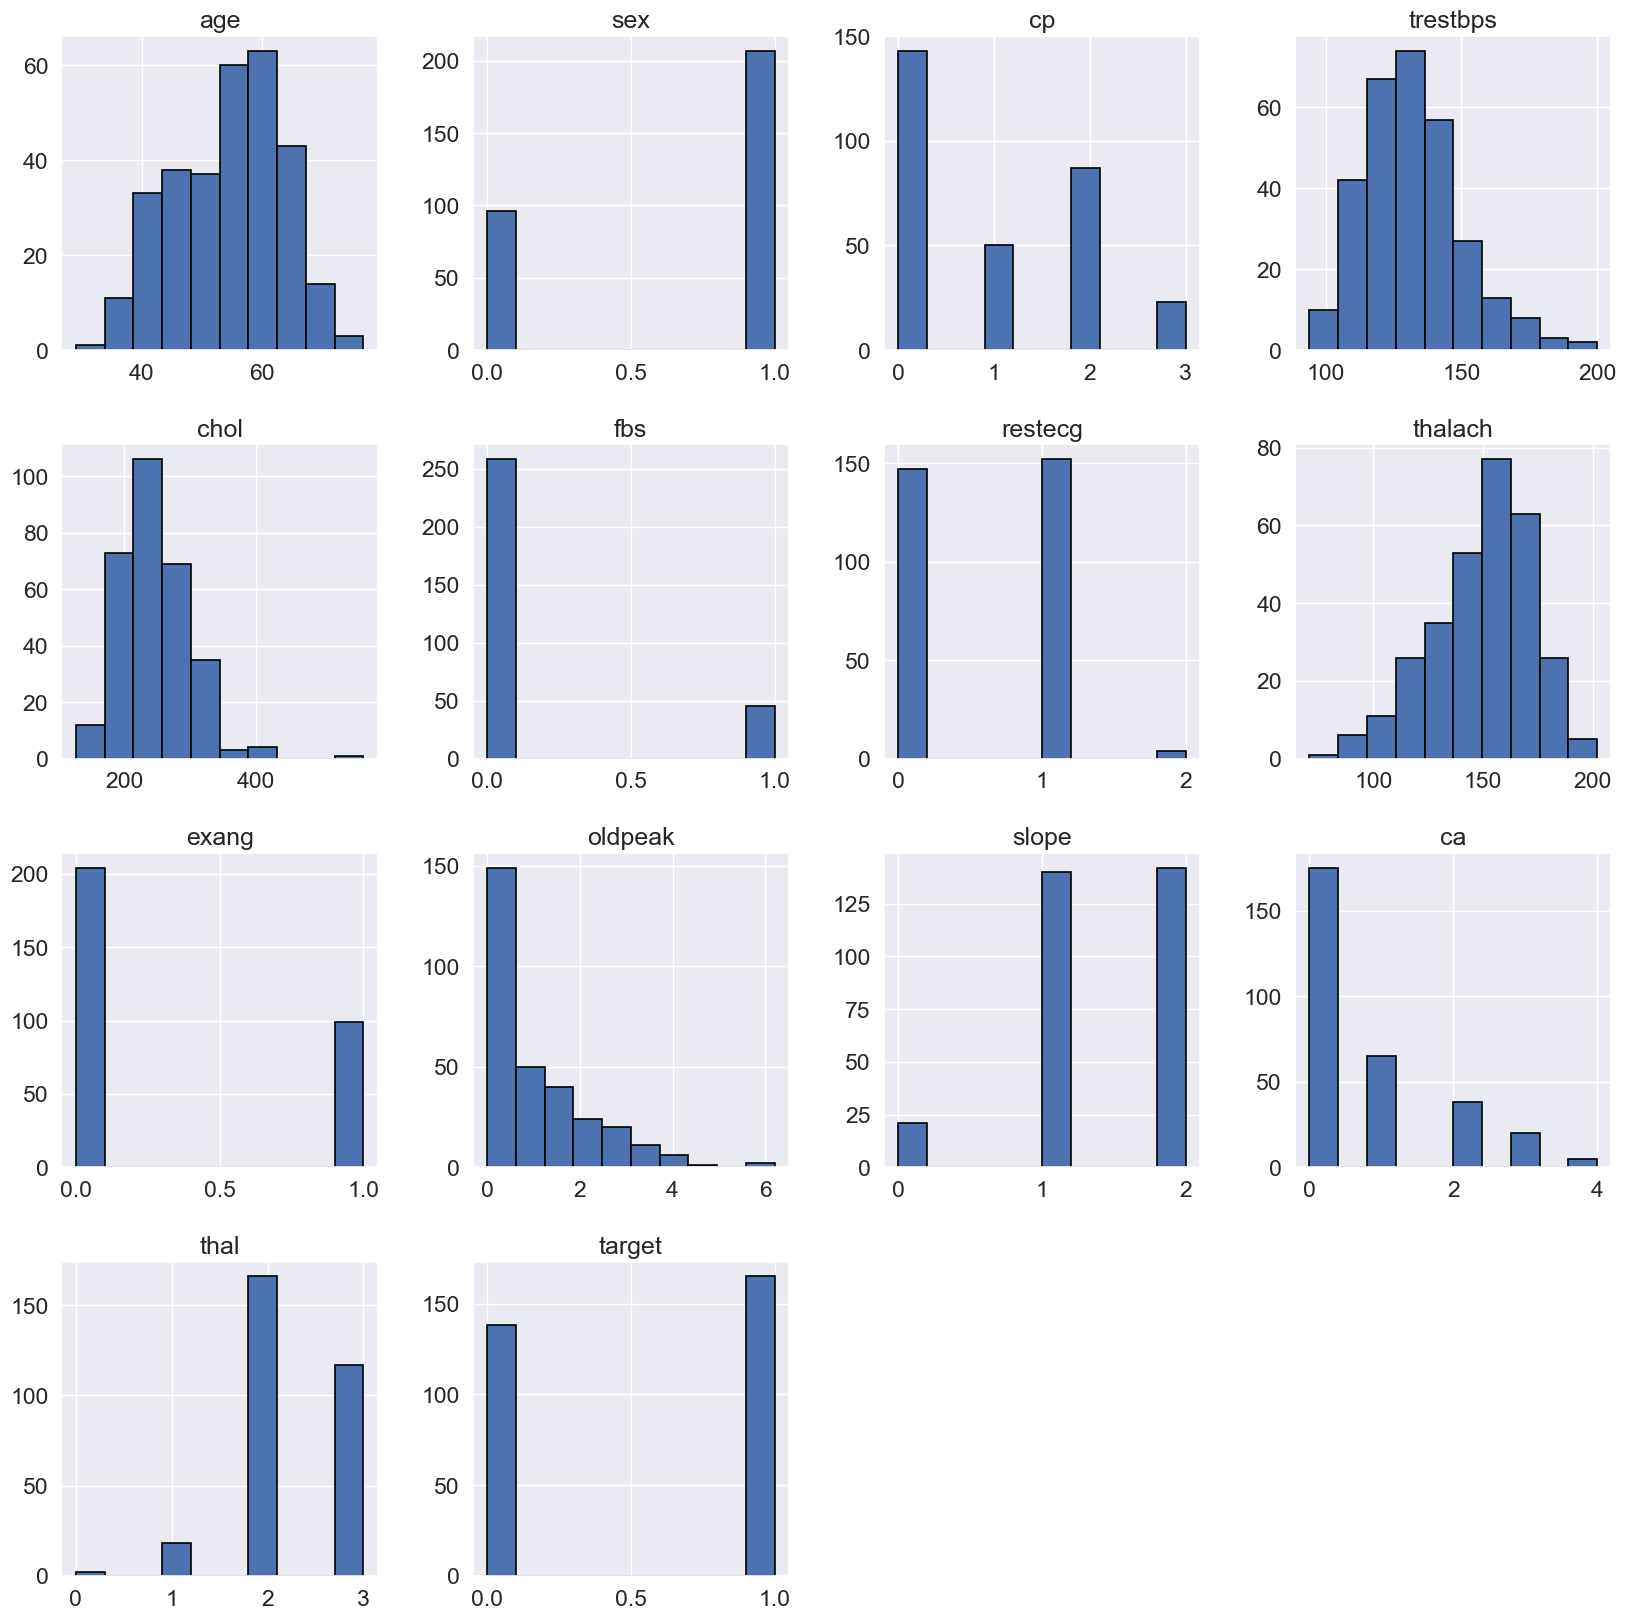

In [68]:
sns.set_theme(font_scale=1.5)
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

/var/folders/56/ymqjlns93r5fv__q4lx2xr4r0000gn/T/ipykernel_82360/1204215177.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.catplot(


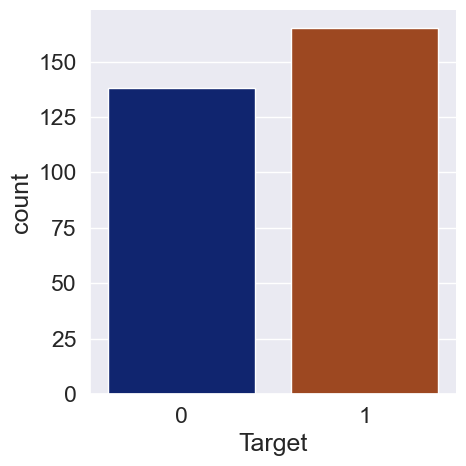

In [69]:
ax = sns.catplot(
    data=df, kind="count",
    x="target",
    palette="dark",
)

# Set x-axis label
ax.set_axis_labels("Target")

# Rotate the x-axis labels for better readability
# ax.set_xticklabels(rotation=45)

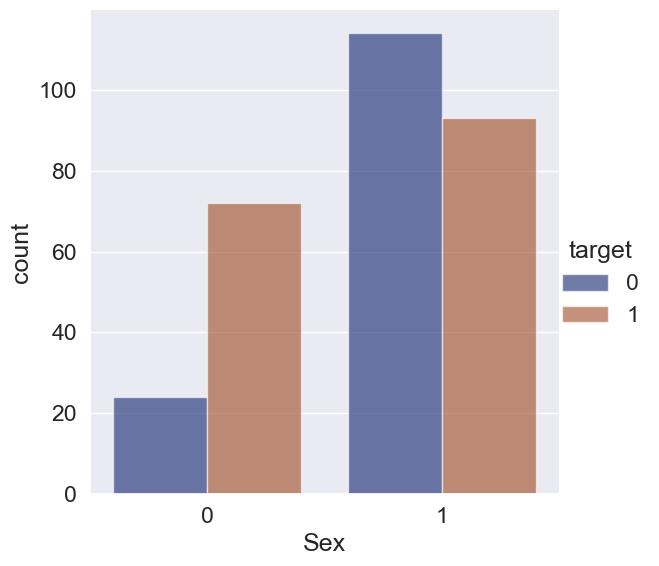

In [70]:
ax = sns.catplot(
    data=df, kind="count",
    x="sex", hue="target",
    palette="dark", alpha=.6, height=6
)

ax.set_axis_labels("Sex")
# ax.legend.set_title("Distribution of target by sex")


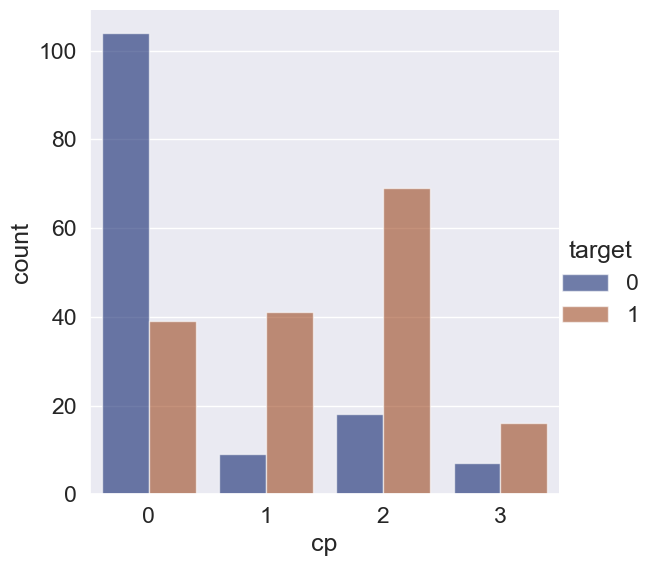

In [71]:
ax = sns.catplot(
    data=df, kind="count",
    x="cp", hue="target",
    palette="dark", alpha=.6, height=6
)

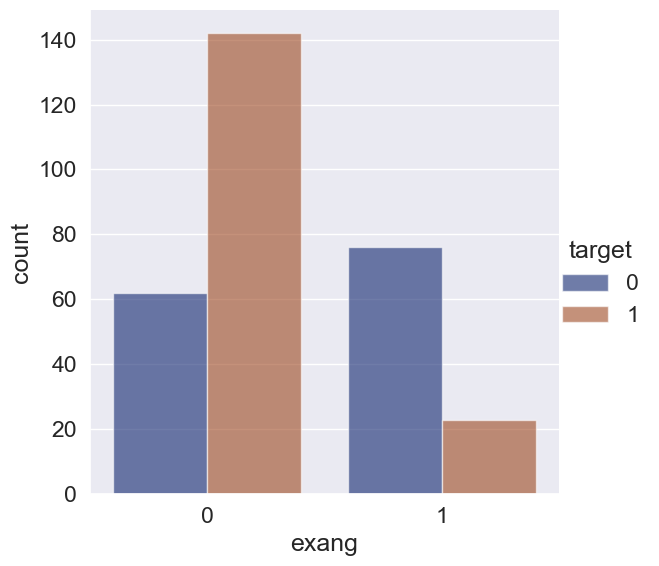

In [72]:
ax = sns.catplot(
    data=df, kind="count",
    x="exang", hue="target",
    palette="dark", alpha=.6, height=6
)

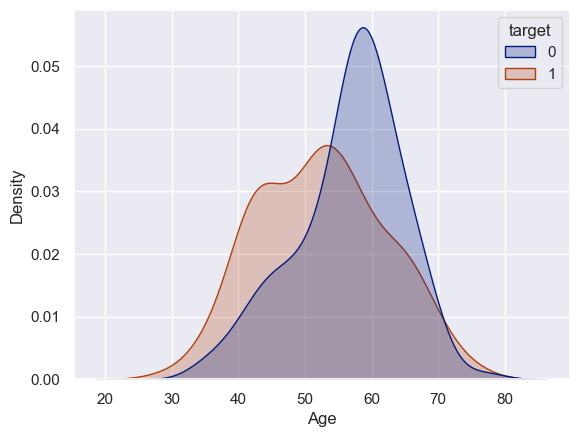

In [73]:
# Set the theme
sns.set_theme(style="darkgrid")

# Create the KDE plot with hue for target
sns.kdeplot(
    data=df, x="age", hue="target", fill=True, 
    palette="dark", common_norm=False, bw_adjust=1
)

# Set axis labels
plt.xlabel("Age")
plt.ylabel("Density")

# Show the plot
plt.show()

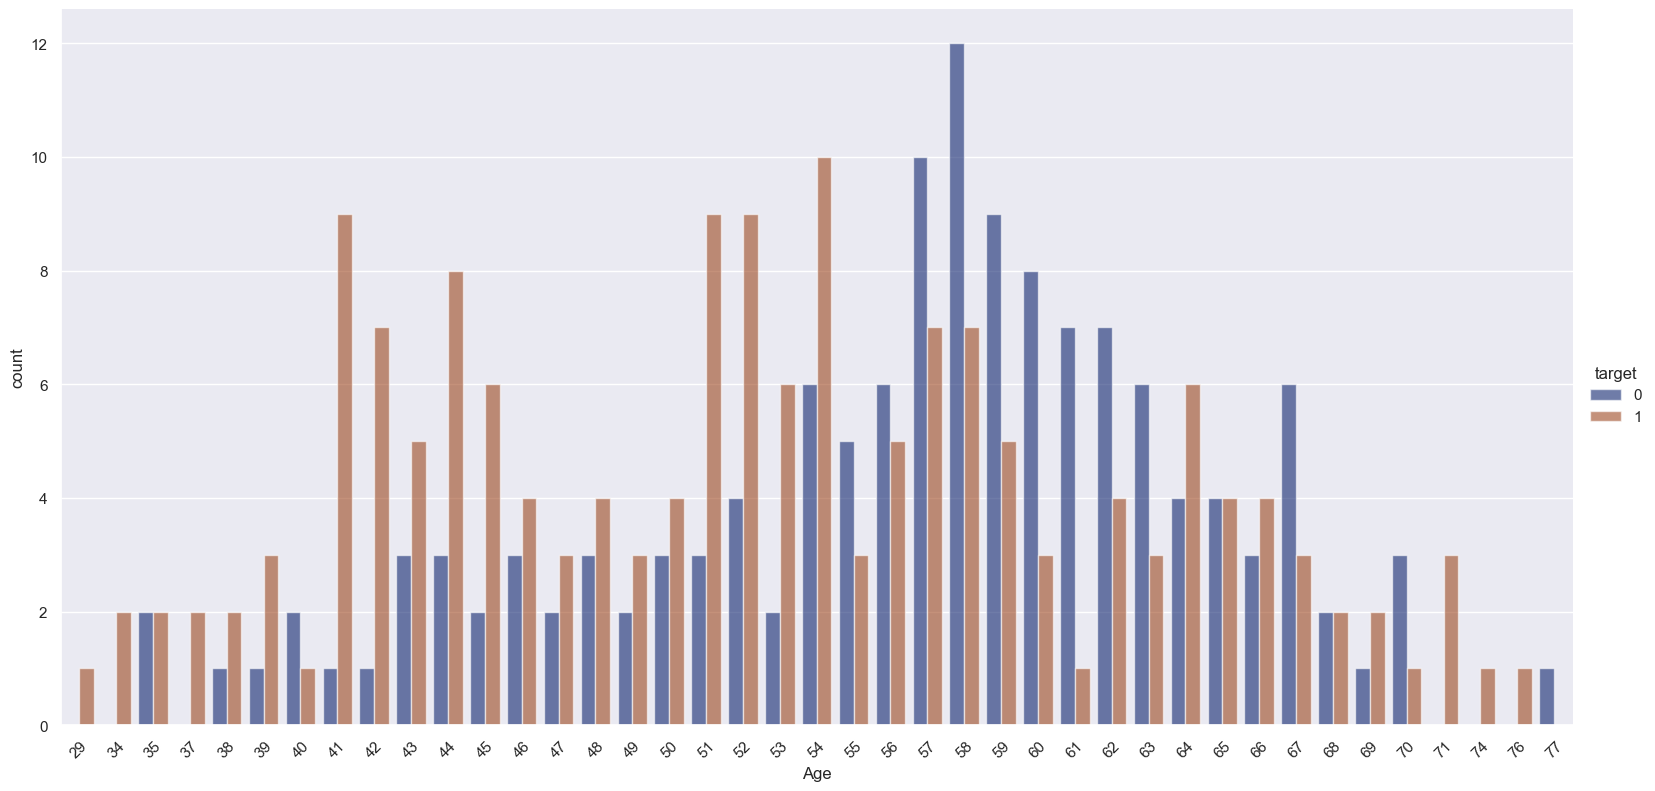

In [74]:
ax = sns.catplot(
    data=df, kind="count",
    x="age", hue="target",
    palette="dark", alpha=.6, height=8, aspect=2  # Increase height and aspect ratio for a bigger plot
)

# Set x-axis label
ax.set_axis_labels("Age")

# Rotate the x-axis labels for better readability
ax.set_xticklabels(rotation=45)

<Axes: >

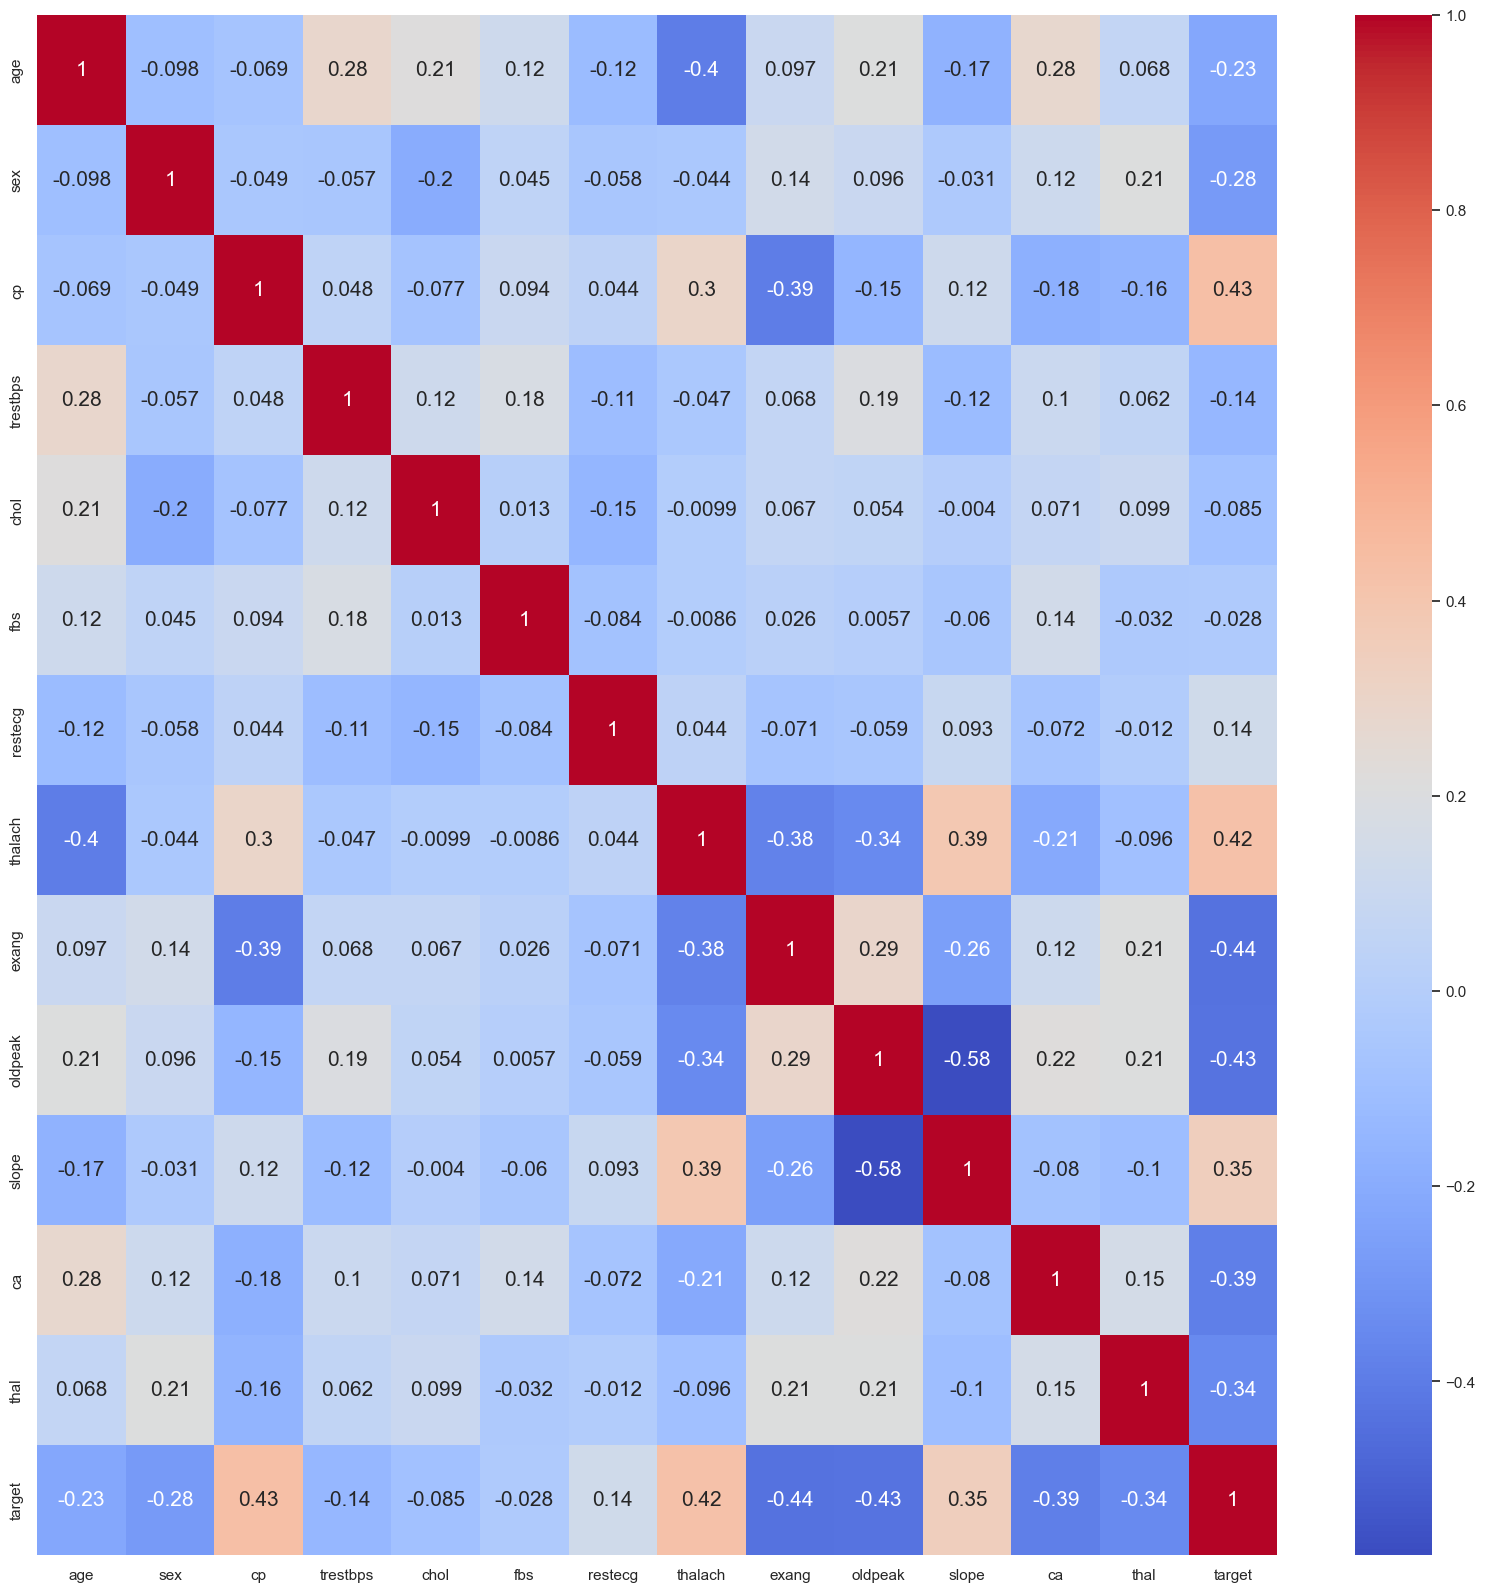

In [75]:
corr_matrix = df.corr()
top_corr_feature = corr_matrix.index
plt.figure(figsize=(20, 20))
sns.heatmap(df[top_corr_feature].corr(), annot=True, cmap="coolwarm", annot_kws={"size":15})

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### What to keep? 
* age 
* sex : gender
* cp : chest pain
* trestbps : blood pressure
* chol : cholesterol
* thalach : max heart rate
* target 

In [77]:
df = df.dropna()
df = df.drop(columns = ['fbs', 'restecg', 'exang', 'oldpeak', 'slope', 'ca', 'oldpeak'])
df = df.rename(columns = {
    'age': 'age', 
    'sex': 'gender',
    'cp' : 'chest pain', 
    'trestbps' : 'blood pressure', 
    'chol' : 'cholesterol', 
    'thalach': 'max heart rate'
    })
df.head()

,age,gender,chest pain,blood pressure,cholesterol,max heart rate,thal,target
0,63,1,3,145,233,150,1,1
1,37,1,2,130,250,187,2,1
2,41,0,1,130,204,172,2,1
3,56,1,1,120,236,178,2,1
4,57,0,0,120,354,163,2,1


### Logistic Regression 

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, confusion_matrix, roc_curve, recall_score

In [79]:
# Determining the predictor variables
X = df.drop(["target"],axis = 1)
# Determining the target variables
y = df.target
# Splitting the data to training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state =42)

In [80]:
# Instantiating logistic regression
lr = LogisticRegression(random_state=42)
# Fitting the model
lr.fit(X_train, y_train)

/Users/alidabouatta/miniforge3/envs/pythonenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [81]:
# Predicting on training and test sets
lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

# Evaluating the model on the training set
lr_train_auc = roc_auc_score(y_train, lr_train_pred)
# Evaluating the model on the test set
lr_test_auc = roc_auc_score(y_test, lr_test_pred)

In [82]:
# Evaluating the balanced classes data
print(f'baseline logreg Train AUC - {lr_train_auc} \nbaseline logreg Test AUC - {lr_test_auc}')

baseline logreg Train AUC - 0.7805063116506863 
baseline logreg Test AUC - 0.8857758620689655


Accuracy : 0.8852459016393442
Recall : 0.875
Balanced Accuracy : 0.8857758620689655
F1 Score : 0.8888888888888888
AUC Score:  0.8857758620689655


<Axes: >

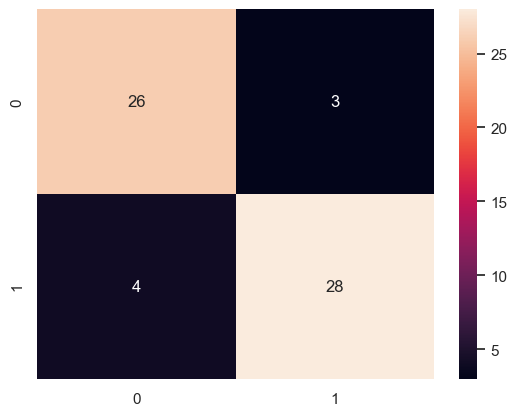

In [83]:
print('Accuracy :', accuracy_score(y_test,lr_test_pred))
print('Recall :', recall_score(y_test,lr_test_pred))
print('Balanced Accuracy :', balanced_accuracy_score(y_test,lr_test_pred))
print('F1 Score :', f1_score(y_test,lr_test_pred))
print('AUC Score: ', roc_auc_score(y_test,lr_test_pred))

cm = confusion_matrix(y_test,lr_test_pred)

sns.heatmap(cm, annot=True, fmt='d')

### KNN 

In [84]:
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 


In [91]:
X = df.drop("target", axis=1) 
y = df["target"] 

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [96]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [97]:
# Predicting on training and test sets
knn_train_pred = knn.predict(X_train)
knn_test_pred = knn.predict(X_test)

# Evaluating the model on the training set
knn_train_auc = roc_auc_score(y_train, knn_train_pred)
# Evaluating the model on the test set
knn_test_auc = roc_auc_score(y_test, knn_test_pred)

In [101]:
# Evaluating the balanced classes data
print(f'baseline knn Train AUC - {knn_train_auc} \nbaseline knn Test AUC - {knn_test_auc}')

baseline knn Train AUC - 0.8351727943712492 
baseline knn Test AUC - 0.8405172413793103


Accuracy : 0.8360655737704918
Recall : 0.75
Balanced Accuracy : 0.8405172413793103
F1 Score : 0.8275862068965517
AUC Score:  0.8405172413793103


<Axes: >

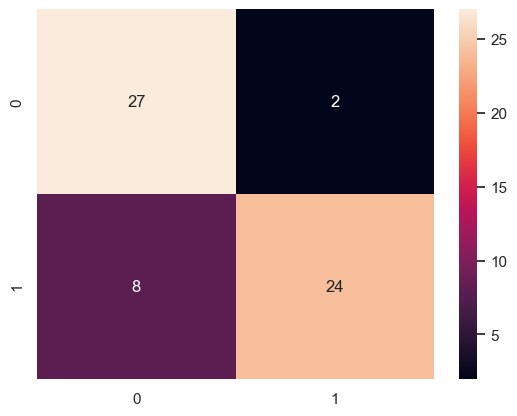

In [99]:
print('Accuracy :', accuracy_score(y_test,knn_test_pred))
print('Recall :', recall_score(y_test,knn_test_pred))
print('Balanced Accuracy :', balanced_accuracy_score(y_test,knn_test_pred))
print('F1 Score :', f1_score(y_test,knn_test_pred))
print('AUC Score: ', roc_auc_score(y_test,knn_test_pred))

cm = confusion_matrix(y_test,knn_test_pred)

sns.heatmap(cm, annot=True, fmt='d')